In [9]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
transaction = pd.read_csv('transaction.csv', sep=';')

print(transaction.head())

modified_customer = 'modified_customer_data.csv'
customer_data = pd.read_csv(modified_customer, delimiter=',')
print(customer_data.head())

         TXN_ID  CUSTOMER_ID    TXN_DATE    AMOUNT CASH_NONCASH CREDIT_DEBIT  \
0  e8efeb3c77e6          565  2022-01-01     84.77            C            C   
1  4c65fc3f7297         6498  2022-01-01     72.51           NC            D   
2  dacac65d4da4         2614  2022-01-01  14215.88           NC            D   
3  813bf7a65367         5532  2022-01-01     57.96            C            C   
4  798ff60ece0e         8003  2022-01-01     85.00           NC            C   

  ORIGIN_COUNTRY TARGET_COUNTRY  
0             CZ             CZ  
1             CZ             RU  
2             CZ             CZ  
3             CZ             AT  
4             CZ             CZ  
   CUSTOMER_ID SEGMENT_CODE       SEGMENT_NAME  RISK_RATING RISK_RATING_NAME  \
0         4632          EMP           Employee          3.0             High   
1         9176         ENTR       Entrepreneur          1.0              Low   
2         9636          PER  Personal Customer          3.0             Hig

In [11]:
#task a calculate customer rate in each risk level
# Count the number of customers in each risk level
risk_counts = customer_data['RISK_RATING_NAME'].value_counts()

# calculate %
risk_percentage = (risk_counts / len (customer_data)) * 100

In [13]:
# Percentage of customers in each segment
# Count the number of customers in each segment
segment_counts = customer_data['SEGMENT_NAME'].value_counts()
# Calculate the percentage
segment_percentage = (segment_counts / len(customer_data)) * 100

In [15]:
# Percentage of high-risk customers in each segment
# Make a filter for high-risk customers
high_risk_customers = customer_data[customer_data['RISK_RATING_NAME'] == 'High']
# Count the number of high-risk customers in each segment
high_risk_segment_counts = high_risk_customers['SEGMENT_NAME'].value_counts()
# Calculate the percentage
high_risk_segment_percentage = (high_risk_segment_counts / len(high_risk_customers)) * 100

In [17]:
# Check the results
print("Percentage of customers in each risk level:")
print(risk_percentage)

print("\nPercentage of customers in each segment:")
print(segment_percentage)

print("\nPercentage of high-risk customers in each segment:")
print(high_risk_segment_percentage)

Percentage of customers in each risk level:
RISK_RATING_NAME
High      56.15
Medium    22.81
Low       21.04
Name: count, dtype: float64

Percentage of customers in each segment:
SEGMENT_NAME
Personal Customer                    47.46
Entrepreneur                         23.53
Employee                             14.85
Government institution                3.36
Large Corporate                       3.22
Public Institution                    2.57
Small and medium-sized enterprise     2.29
Financial institution                 1.41
Private Banking                       1.31
Name: count, dtype: float64

Percentage of high-risk customers in each segment:
SEGMENT_NAME
Personal Customer                    56.865539
Entrepreneur                         21.478183
Employee                              9.759573
Small and medium-sized enterprise     3.009795
Government institution                2.635797
Large Corporate                       1.887801
Public Institution                    1.816563

In [19]:
# Task b calculates the average transaction amount in each segment
# Combined customer information with their transaction 
combined_data = pd.merge(transaction, customer_data, on='CUSTOMER_ID', how='inner')


In [21]:
# Calculates the average transaction each segment
average_transaction = combined_data.groupby('SEGMENT_NAME')['AMOUNT'].mean()

In [23]:
# Check result
print("Average transaction amount:")
print(average_transaction)

Average transaction amount:
SEGMENT_NAME
Employee                               149.747229
Entrepreneur                          2000.431361
Financial institution                 8505.079112
Government institution               14941.375151
Large Corporate                      20577.102670
Personal Customer                      115.172890
Private Banking                       1995.355851
Public Institution                     419.728837
Small and medium-sized enterprise      997.748465
Name: AMOUNT, dtype: float64


In [25]:
# Task c: Identify the top 5 customers with the highest transaction amount in each risk category
# Sort descending order
high_risk_customers  = combined_data.groupby('RISK_RATING_NAME', group_keys=False).apply(
    lambda group: group.sort_values(by='AMOUNT', ascending=False).head(5)
)

In [31]:
# check the results after clarified
print("5 customers with the highest value per transaction")
print(high_risk_customers[['CUSTOMER_ID', 'RISK_RATING_NAME', 'AMOUNT']])

5 customers with the highest value per transaction
        CUSTOMER_ID RISK_RATING_NAME    AMOUNT
624152         4958             High  46805.71
349951         2576             High  45354.22
966453          911             High  44832.33
966144          911             High  44592.23
349601         2576             High  44500.07
685810         4106              Low  49644.81
791690         7887              Low  48959.67
853194         9217              Low  48481.64
936164         2364              Low  46815.76
503549         7616              Low  46098.08
471709         6501           Medium  45340.57
262606         1071           Medium  44845.37
471777         6501           Medium  43948.47
998476          688           Medium  42909.54
794493         6113           Medium  42714.79


In [33]:
# Task d the transaction distribution by segment
# Make the group of the data and count transaction
transaction_distribution = combined_data['SEGMENT_NAME'].value_counts()

In [35]:
# check the result 
print("Transaction Distribution")
print(transaction_distribution)

Transaction Distribution
SEGMENT_NAME
Personal Customer                    552515
Entrepreneur                         199593
Employee                              98396
Public Institution                    50139
Small and medium-sized enterprise     30322
Large Corporate                       29125
Financial institution                 20193
Government institution                 9915
Private Banking                        9802
Name: count, dtype: int64


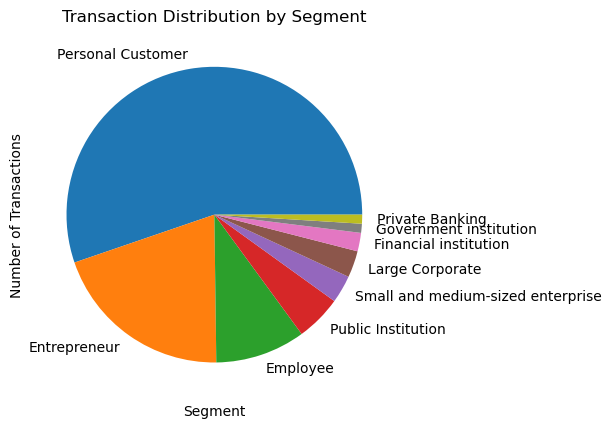

In [37]:
transaction_distribution.plot(kind='pie', title='Transaction Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Transactions')
plt.show()

In [39]:
# Task e define dormant customer and find their rate in the each segment
# Define dormant date
combined_data['TXN_DATE'] = pd.to_datetime(combined_data['TXN_DATE'])

# Find latest transaction date
latest_date = combined_data['TXN_DATE'].max()

# Set cutoff date for dormant customers, basically 6-12 months, so I set 6 months here 
cutoff_date = latest_date - pd.DateOffset(months=6)

# Find dormant customers by CUSTOMER_ID
dormant_customers = combined_data[combined_data['TXN_DATE'] < cutoff_date]['CUSTOMER_ID'].unique()

In [41]:
# Set dormant customers in customer data
customer_data['DORMANT'] = customer_data['CUSTOMER_ID'].isin(dormant_customers)

In [43]:
# calculate % in each segment
dormant_percentage = customer_data.groupby('SEGMENT_NAME')['DORMANT'].mean() * 100

In [45]:
# Check the result 
print("Dormant customer percentage in each segment")
print(dormant_percentage)

Dormant customer percentage in each segment
SEGMENT_NAME
Employee                              9.898990
Entrepreneur                          3.484913
Financial institution                 2.127660
Government institution               10.714286
Large Corporate                       9.006211
Personal Customer                    15.002107
Private Banking                      20.610687
Public Institution                    4.669261
Small and medium-sized enterprise    11.790393
Name: DORMANT, dtype: float64


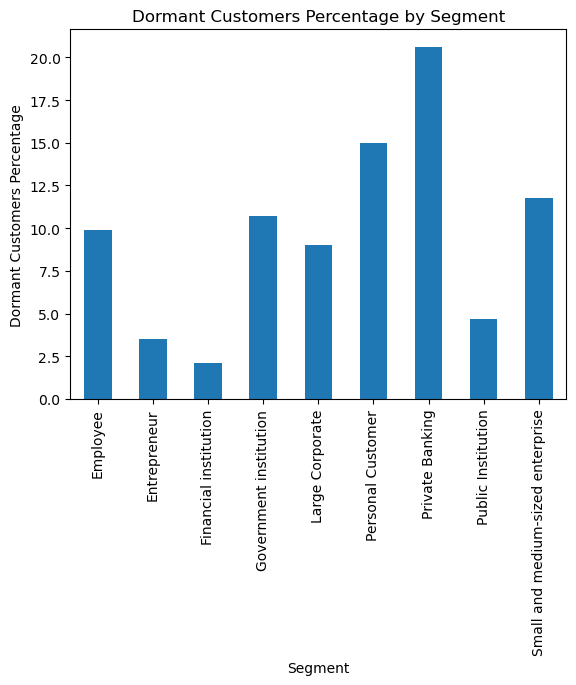

In [47]:
# make graph to see easily
dormant_percentage.plot(kind='bar', title='Dormant Customers Percentage by Segment')
plt.xlabel('Segment')
plt.ylabel('Dormant Customers Percentage')
plt.show()

In [49]:
# task f Visualize average monthly revenue
# Change monthly format
combined_data ['MONTH'] = combined_data['TXN_DATE'].dt.to_period('M')

In [51]:
# Calculate the total revenue and sum the transaction amounts for each segment and month
segment_data = combined_data.groupby(['SEGMENT_NAME', 'MONTH'])['AMOUNT'].sum()

reset_data = segment_data.reset_index()

reset_data.rename(columns={'AMOUNT': 'TOTAL_REVENUE'}, inplace=True)

monthly_revenue = reset_data


In [53]:
# Calculate average revenue in the month
average_revenue = (
    monthly_revenue.groupby('SEGMENT_NAME')['TOTAL_REVENUE'].mean()
)

In [55]:
# Check the result 
print("Average monthly revenue each segment:")
print(average_revenue)

Average monthly revenue each segment:
SEGMENT_NAME
Employee                             1.227877e+06
Entrepreneur                         3.327267e+07
Financial institution                1.431192e+07
Government institution               1.234531e+07
Large Corporate                      4.994234e+07
Personal Customer                    5.302896e+06
Private Banking                      1.629873e+06
Public Institution                   1.753732e+06
Small and medium-sized enterprise    2.521144e+06
Name: TOTAL_REVENUE, dtype: float64


In [57]:
formatted_revenue = average_revenue.apply(lambda x: f"{x:,.2f}")
print(formatted_revenue)

SEGMENT_NAME
Employee                              1,227,877.36
Entrepreneur                         33,272,674.72
Financial institution                14,311,921.88
Government institution               12,345,311.22
Large Corporate                      49,942,342.94
Personal Customer                     5,302,895.76
Private Banking                       1,629,873.17
Public Institution                    1,753,732.01
Small and medium-sized enterprise     2,521,144.08
Name: TOTAL_REVENUE, dtype: object


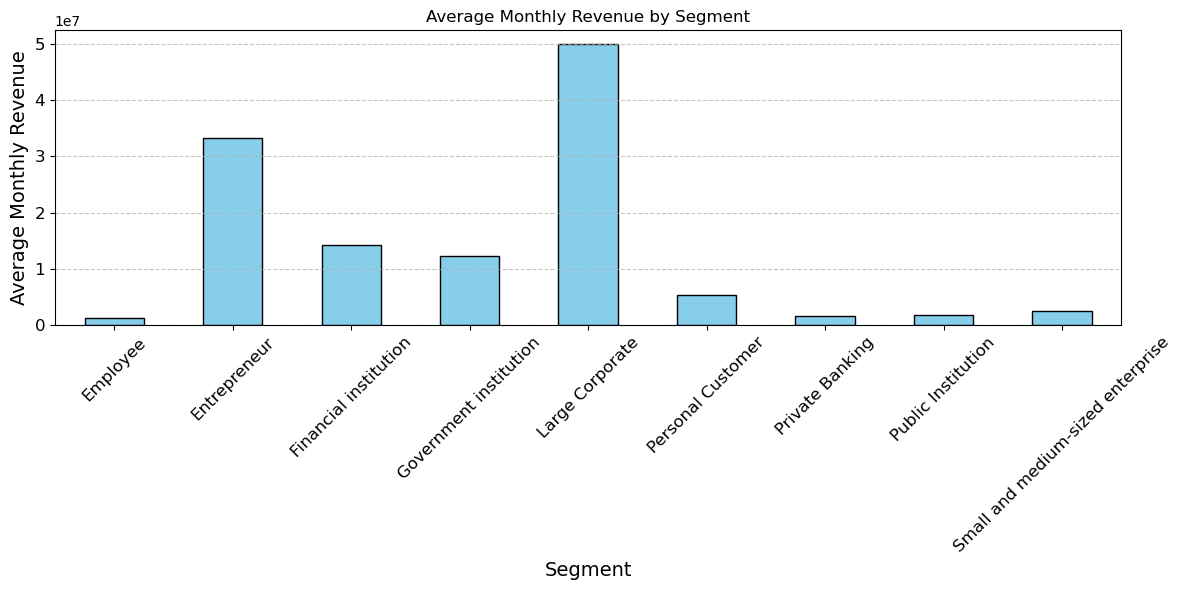

In [59]:
#  Visualize the results using a bar chart
plt.figure(figsize=(12, 6)) 
average_revenue.plot(
    kind='bar',
    color='skyblue',  
    edgecolor='black',  
    title='Average Monthly Revenue by Segment'
)
plt.xlabel('Segment', fontsize=14)  
plt.ylabel('Average Monthly Revenue', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


In [61]:
# Task g Visualize the flow of money between countries
# Calculate the total flow of funds between each pair of countries
funds_flow = (
    combined_data.groupby(['ORIGIN_COUNTRY', 'TARGET_COUNTRY'])['AMOUNT'].sum()
    .reset_index()
    .rename(columns={'AMOUNT': 'TOTAL_FLOW'})
)

In [79]:
pd.options.display.float_format = '{:,.0f}'.format
print(sorted_funds_flow)

    ORIGIN_COUNTRY TARGET_COUNTRY  TOTAL_FLOW COUNTRY_PAIR
45              CZ             CZ 494,031,420      CZ → CZ
42              CZ             AT  70,797,396      CZ → AT
53              CZ             UA  65,713,970      CZ → UA
43              CZ             CH  60,606,595      CZ → CH
47              CZ             FR  56,940,063      CZ → FR
..             ...            ...         ...          ...
12              AT             UK     474,142      AT → UK
181             UK             US     454,782      UK → US
160             UA             IT     443,767      UA → IT
180             UK             UK     415,418      UK → UK
97              IT             US     407,969      IT → US

[196 rows x 4 columns]


In [73]:
# Sort the data by 'TOTAL_FLOW' in descending order
sorted_funds_flow = funds_flow.sort_values(by='TOTAL_FLOW', ascending=False)

# Create a new column for combined country pairs
sorted_funds_flow['COUNTRY_PAIR'] = (
    sorted_funds_flow['ORIGIN_COUNTRY'] + " → " + sorted_funds_flow['TARGET_COUNTRY']
)

In [81]:
# Check the result 
print("List of fund flows")
print(sorted_funds_flow)

List of fund flows
    ORIGIN_COUNTRY TARGET_COUNTRY  TOTAL_FLOW COUNTRY_PAIR
45              CZ             CZ 494,031,420      CZ → CZ
42              CZ             AT  70,797,396      CZ → AT
53              CZ             UA  65,713,970      CZ → UA
43              CZ             CH  60,606,595      CZ → CH
47              CZ             FR  56,940,063      CZ → FR
..             ...            ...         ...          ...
12              AT             UK     474,142      AT → UK
181             UK             US     454,782      UK → US
160             UA             IT     443,767      UA → IT
180             UK             UK     415,418      UK → UK
97              IT             US     407,969      IT → US

[196 rows x 4 columns]


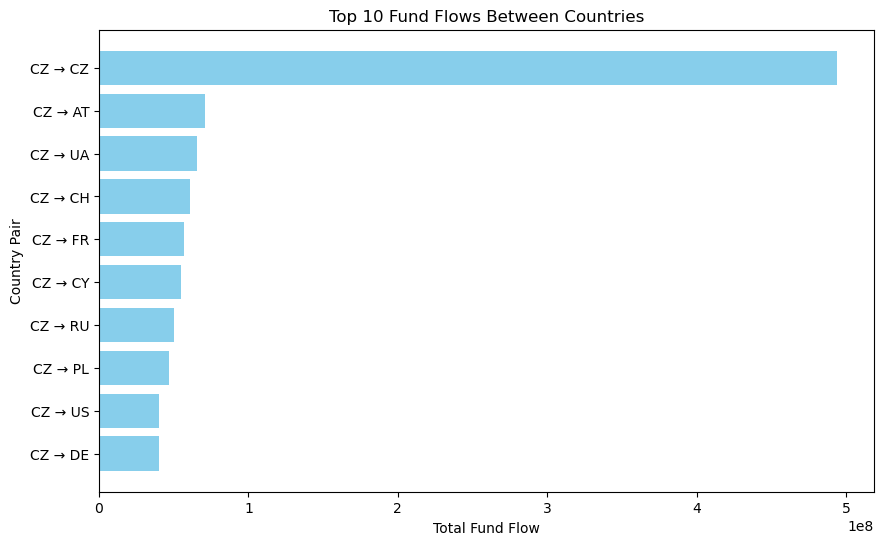

In [89]:
# Visualize the top 10 fund flows as an example
top_10_flows = sorted_funds_flow.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_flows['COUNTRY_PAIR'], top_10_flows['TOTAL_FLOW'], color='skyblue')
plt.xlabel('Total Fund Flow')
plt.ylabel('Country Pair')
plt.title('Top 10 Fund Flows Between Countries')
plt.gca().invert_yaxis()
plt.show()

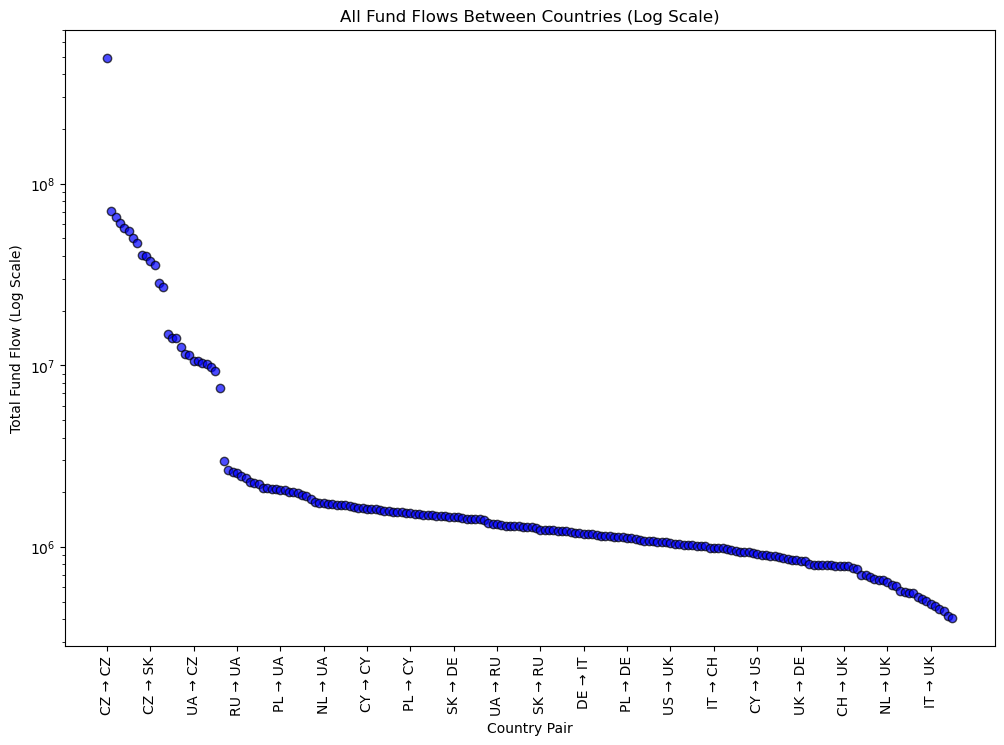

In [113]:
# Scatter plot with log-scaled Y-axis
plt.figure(figsize=(12, 8))
plt.scatter(
    sorted_funds_flow['COUNTRY_PAIR'], 
    sorted_funds_flow['TOTAL_FLOW'], 
    alpha=0.7, 
    color='blue', 
    edgecolor='black'
)
plt.yscale('log')  # use log to see clearly
plt.title('All Fund Flows Between Countries (Log Scale)')
plt.xlabel('Country Pair')
plt.ylabel('Total Fund Flow (Log Scale)')

# Reduce the number of X axis
plt.xticks(
    ticks=range(0, len(sorted_funds_flow), 10), 
    labels=sorted_funds_flow['COUNTRY_PAIR'][::10], 
    rotation=90
)
plt.show()


In [119]:
# Task h Visualize define domestic and international
# define domestic and international transaction
combined_data['TRANSACTION_TYPE'] = combined_data.apply(
    lambda row : 'Domestic' if row['ORIGIN_COUNTRY'] == row['TARGET_COUNTRY'] else 'International',
    axis = 1
)

In [123]:
# Count the number of domestic and international transactions for each segment
transaction_type = combined_data.groupby(['SEGMENT_NAME', 'TRANSACTION_TYPE']).size().unstack()

# Calculates the ratio of domestic and international for each segment
transaction_ratio = transaction_type.div(transaction_type.sum(axis=1), axis=0) * 100

In [127]:
# check the result
print("Domestic and International transactions ratio:")
print(transaction_ratio)

Domestic and International transactions ratio:
TRANSACTION_TYPE                   Domestic  International
SEGMENT_NAME                                              
Employee                                 54             46
Entrepreneur                             38             62
Financial institution                    21             79
Government institution                   72             28
Large Corporate                          25             75
Personal Customer                        71             29
Private Banking                          34             66
Public Institution                       40             60
Small and medium-sized enterprise        31             69


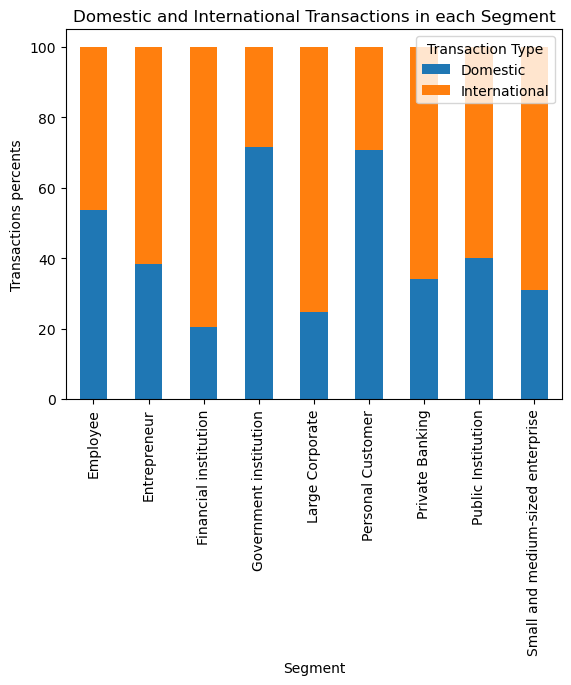

In [135]:
# visualize the result 
transaction_ratio.plot(
    kind='bar',
    stacked=True,
    title='Domestic and International Transactions in each Segment'
)
plt.xlabel('Segment')
plt.ylabel('Transactions percents')
plt.legend(title='Transaction Type')
plt.show()

In [163]:
# Statistics part
# Check the relation between segments and transaction
from scipy.stats import f_oneway

segment_data = [
    combined_data[combined_data['SEGMENT_NAME'] == segment]['AMOUNT']
    for segment in combined_data['SEGMENT_NAME'].unique()
]

# ANOVA　for checking
anova_result = f_oneway(*segment_data)

# Check the results
print("ANOVA Analysis Results:")
print(f"F-value: {anova_result.statistic:.2f}")  
print(f"P-value: {anova_result.pvalue:.1f}") 


ANOVA Analysis Results:
F-value: 1216602.93
P-value: 0.0


In [171]:
# Check the correlation between risk level and transaction amount
from scipy.stats import pearsonr

# calculate p-value correlation coefficient
correlation, p_value= pearsonr(combined_data['RISK_RATING'], combined_data['AMOUNT'])

In [175]:
# check the result 
print("Pearson Correlation Analysis Results:")
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.1f}") 

Pearson Correlation Analysis Results:
Correlation Coefficient: -0.18
P-value: 0.0


In [187]:
# Relation of segment and direction of transaction (credit/debit)
from scipy.stats import chi2_contingency

# Chi-square test
contingency = pd.crosstab(combined_data['SEGMENT_NAME'], combined_data['CREDIT_DEBIT'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency)

print(contingency)

CREDIT_DEBIT                            C       D
SEGMENT_NAME                                     
Employee                            64073   34323
Entrepreneur                       110098   89495
Financial institution               15200    4993
Government institution               3485    6430
Large Corporate                      8665   20460
Personal Customer                  358801  193714
Private Banking                      8372    1430
Public Institution                  27665   22474
Small and medium-sized enterprise   21169    9153


In [185]:
# check the results
print("Chi-Square Test Results:")
print(f"Chi-Square Value: {chi2_stat:.2f}")
print(f"P-value: {p_value:.1f}") 

Chi-Square Test Results:
Chi-Square Value: 27757.03
P-value: 0.0


In [288]:
# Relation of segment and type of transaction (cash flag)
contingency_2 = pd.crosstab(combined_data['SEGMENT_NAME'], combined_data['CASH_NONCASH'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_2)

print(contingency_2)

CASH_NONCASH                            C      NC
SEGMENT_NAME                                     
Employee                            33291   65105
Entrepreneur                        24013  175580
Financial institution                1048   19145
Government institution                189    9726
Large Corporate                      2969   26156
Personal Customer                  110357  442158
Private Banking                      2431    7371
Public Institution                   4967   45172
Small and medium-sized enterprise    6620   23702


In [193]:
# Check the results
print("Chi-Square Test Results for Cash flag:")
print(f"Chi-Square Value: {chi2_stat:.2f}") 
print(f"P-value: {p_value:.1f}") 

Chi-Square Test Results for Cash flag:
Chi-Square Value: 30016.83
P-value: 0.0


In [227]:
# Reference from Basel AML Index 2024 EU and Western Europe data
#import csv
aml_data = pd.read_csv('europe_aml_risk.csv')

In [229]:
# change data type
transaction['AMOUNT'] = pd.to_numeric(transaction['AMOUNT'], errors='coerce')

In [231]:
# Change to data format
transaction['TXN_DATE'] = pd.to_datetime(transaction['TXN_DATE'], errors='coerce')

In [237]:
# Combined risk score with transaction data(origin)
transaction = transaction.merge(aml_data, how='left', left_on='ORIGIN_COUNTRY', right_on='ORIGIN_COUNTRY')

In [239]:
# Rename to adopt target country
aml_target_data = aml_data.rename(columns={'ORIGIN_COUNTRY': 'TARGET_COUNTRY'})

In [241]:
# Combined risk score with transaction data(target)
transaction = transaction.merge(aml_target_data, how='left', on='TARGET_COUNTRY', suffixes=('_ORIGIN', '_TARGET'))

In [243]:
# calculate average risk score between origin and target
transaction['TRANSACTION_RISK_SCORE'] = (
    transaction['Risk Score_ORIGIN'] + transaction['Risk Score_TARGET']
) / 2

In [255]:
# calculate risk score
transaction['WEIGHTED_RISK_SCORE'] = transaction['TRANSACTION_RISK_SCORE'] * transaction['AMOUNT']

In [257]:
# Sum up risk score
risk_summary = transaction.groupby('CUSTOMER_ID').agg(
    total_weighted_risk=('WEIGHTED_RISK_SCORE', 'sum'),
    transaction_count=('TXN_ID', 'count')
).reset_index()

In [259]:
# list up high risk customer 
risk_summary = risk_summary.sort_values(by='total_weighted_risk', ascending=False)

In [261]:
# check the result
print(risk_summary)

      CUSTOMER_ID  total_weighted_risk  transaction_count
259          2090          180,664,253               6815
196          1509          178,304,485               6691
260          2157          174,588,933               6687
305          2613           67,401,677               1059
243          1963           66,882,835               1055
...           ...                  ...                ...
1016         9461              165,930                714
668          6082              165,900                717
308          2648              165,815                700
1069         9928              164,296                725
1026         9576              154,114                682

[1075 rows x 3 columns]


In [276]:
# make AML alert
# csv files are imported already 
# combined data
make_flag = pd.merge(transaction, customer_data, how='left', on='CUSTOMER_ID')

In [278]:
# make alert based on the requirements
alerts = make_flag[
    (make_flag['RISK_RATING'] == 3) & 
    (make_flag['AMOUNT'] >= 30000) & 
    (make_flag['TARGET_COUNTRY'] != 'CZ') 
]

In [280]:
# check the results
print("Alerts:")
print(alerts)

Alerts:
              TXN_ID  CUSTOMER_ID   TXN_DATE  AMOUNT CASH_NONCASH  \
1221    d3e2df292402         5449 2022-01-01  34,755           NC   
8480    69f0de20956c          911 2022-01-03  31,814           NC   
9574    46e6259cfd0e         8263 2022-01-04  31,038           NC   
9685    c152996beebc         4280 2022-01-04  35,833           NC   
11249   52e3de23116c         5449 2022-01-04  30,079           NC   
...              ...          ...        ...     ...          ...   
977843  328cf3b2f55e          911 2022-12-24  39,402            C   
982716  e7a811750cb0         2576 2022-12-27  31,601           NC   
985645  82fb5b901c8d         8263 2022-12-27  32,327           NC   
993213  233a3d6137e3          911 2022-12-29  31,151           NC   
995983  9b86f405ab79         2789 2022-12-30  31,291           NC   

       CREDIT_DEBIT ORIGIN_COUNTRY TARGET_COUNTRY  Country_ORIGIN  \
1221              C             CZ             AT  Czech Republic   
8480              D      

In [283]:
# return alert as a data flame
def alerts_dataframe():
    return alerts

In [285]:
# check the result
alerts_df = alerts_dataframe()
print(alerts_df)

              TXN_ID  CUSTOMER_ID   TXN_DATE  AMOUNT CASH_NONCASH  \
1221    d3e2df292402         5449 2022-01-01  34,755           NC   
8480    69f0de20956c          911 2022-01-03  31,814           NC   
9574    46e6259cfd0e         8263 2022-01-04  31,038           NC   
9685    c152996beebc         4280 2022-01-04  35,833           NC   
11249   52e3de23116c         5449 2022-01-04  30,079           NC   
...              ...          ...        ...     ...          ...   
977843  328cf3b2f55e          911 2022-12-24  39,402            C   
982716  e7a811750cb0         2576 2022-12-27  31,601           NC   
985645  82fb5b901c8d         8263 2022-12-27  32,327           NC   
993213  233a3d6137e3          911 2022-12-29  31,151           NC   
995983  9b86f405ab79         2789 2022-12-30  31,291           NC   

       CREDIT_DEBIT ORIGIN_COUNTRY TARGET_COUNTRY  Country_ORIGIN  \
1221              C             CZ             AT  Czech Republic   
8480              D             C